# Left_knee(SA)

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model ,models, layers, optimizers, utils
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf           
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

In [4]:
tf.__version__

'2.9.0'

In [5]:
#GPU 용량 할당시키기 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2 GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]) # limit in megabytes
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [6]:
sheet = pd.read_csv(r'AII_normal_patime2.csv', index_col = 0)
sheet = sheet.dropna()
# sheet

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [7]:
angle = "left_knee_angle"

In [8]:
number = sheet[["num", angle]]
number

num  left_knee_angle
2        1       155.803554
3        1       150.843867
4        1       147.075209
6        1       166.571720
7        1       171.929148
...    ...              ...
14983   30       160.857094
14984   30       155.399971
14985   30       148.586462
14986   30       117.273242
14987   30       121.618868

[14916 rows x 2 columns]

In [9]:
num = number["num"]
num = np.array(num)
num = list(dict.fromkeys(num))

In [11]:
train_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,29,30]

# Train

In [19]:
# epochs = 10
# batch = 32
# lr = 0.001

In [2]:
# lstm_ae = models.Sequential()
# # Encoder
# lstm_ae.add(layers.LSTM(32, activation='relu', input_shape=(1000, 1), return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=False))
# lstm_ae.add(layers.RepeatVector(1))

# # Decoder
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
# lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

# lstm_ae.summary()

In [3]:
# threshold = []

# train_num = [1,3]

# for i in train_num:
    
#     number_num = number[number["num"]== i].dropna()
#     number_num = number_num[[angle]]
#     number_num = scaler.fit_transform(number_num)
#     number_num = np.reshape(number_num,(number_num.shape[0],1))
#     # print(number_num)

#     lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))
#     history = lstm_ae.fit(number_num, number_num, epochs=epochs, batch_size=batch)
    
#     plt.plot(history.history['loss'], label='train loss')
#     plt.legend()
#     plt.xlabel('Epoch'); plt.ylabel('loss')
#     plt.show()

#     train_x_predictions = lstm_ae.predict(number_num)
#     train_mae_loss = np.mean(np.power(train_x_predictions - number_num, 2), axis=1)

     
#     print(train_mae_loss)
#     plt.plot(train_mae_loss)
#     plt.show()
    
#     train_mae_loss_max = np.max(train_mae_loss)
#     threshold.append(train_mae_loss_max )
    
#     print(f'Reconstruction error threshold: {train_mae_loss_max }')


# threshold_ave = np.mean(threshold)
# threshold_ave



# Pridict

In [14]:
# lstm_ae = models.load_model("lstm_ae_left_knee.h5")
# lstm_ae = tf.keras.models.load_model("lstm_ae_left_knee.h5")

lstm_ae = tf.keras.models.load_model("lstm_ae_left_knee(100_64_3_32_0.1).h5")
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 32)          4352      
                                                                 
 dropout (Dropout)           (None, 1000, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 16)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (None, 1, 16)             0         
                                                        

number :  1
10/10 [==============================] - 0s 4ms/step
(303,)


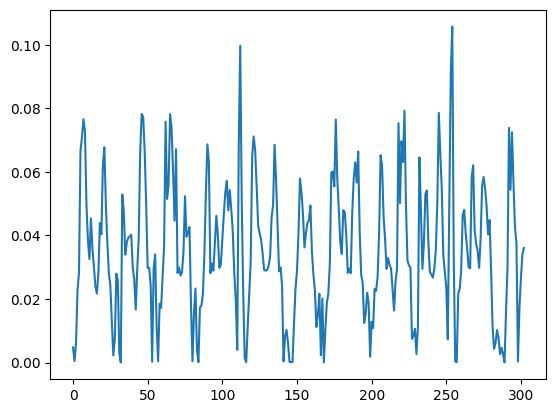

Reconstruction error threshold: 0.10572647127423704
number :  2
16/16 [==============================] - 0s 4ms/step
(504,)


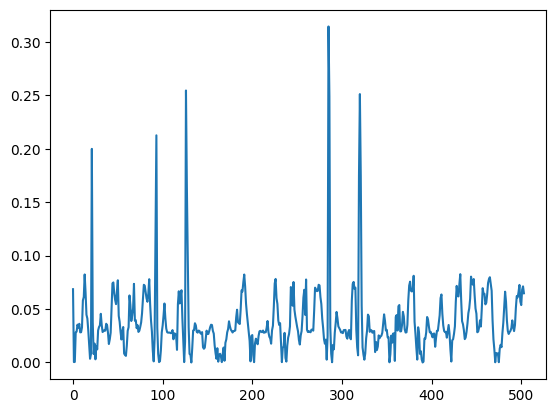

Reconstruction error threshold: 0.3143558959371609
number :  3
17/17 [==============================] - 0s 4ms/step
(535,)


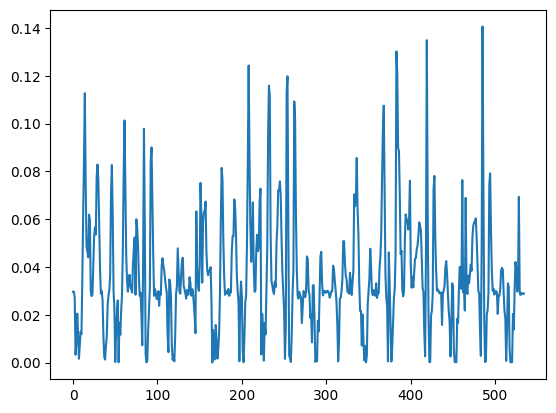

Reconstruction error threshold: 0.14062845670171822
number :  4
23/23 [==============================] - 0s 4ms/step
(717,)


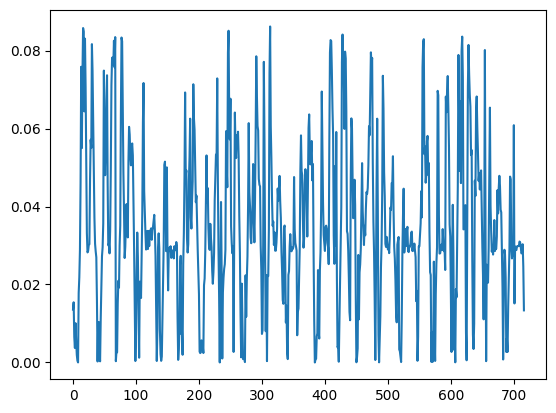

Reconstruction error threshold: 0.08616746781290233
number :  5
24/24 [==============================] - 0s 4ms/step
(741,)


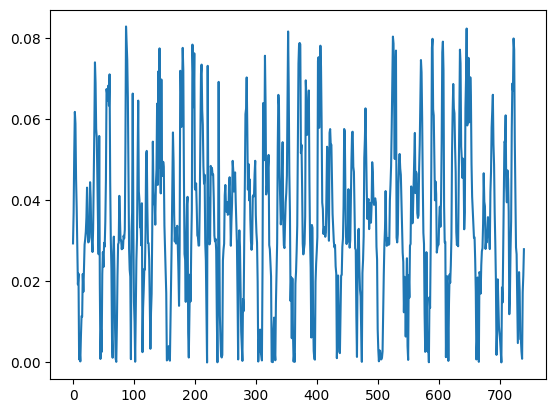

Reconstruction error threshold: 0.08286863187468642
number :  6
27/27 [==============================] - 0s 4ms/step
(853,)


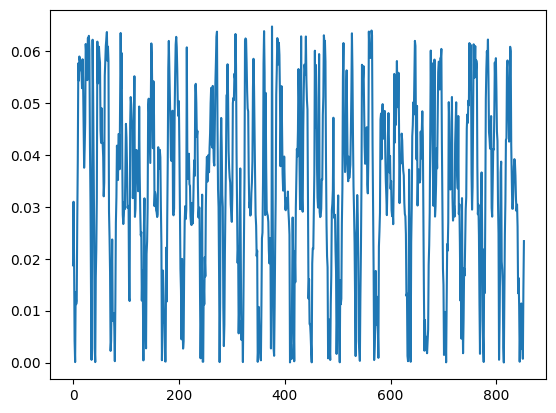

Reconstruction error threshold: 0.06477138281611633
number :  7
27/27 [==============================] - 0s 4ms/step
(845,)


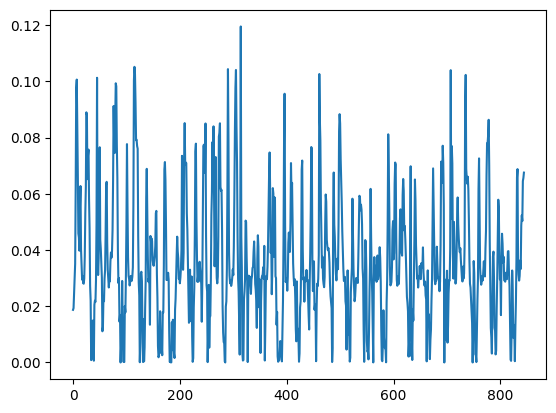

Reconstruction error threshold: 0.11950207429930111
number :  8
25/25 [==============================] - 0s 4ms/step
(773,)


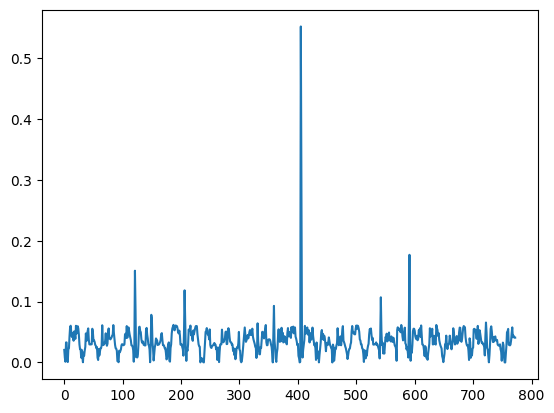

Reconstruction error threshold: 0.551961409296642
number :  9
21/21 [==============================] - 0s 4ms/step
(655,)


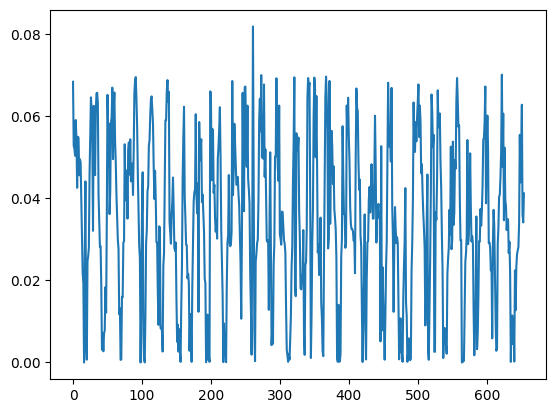

Reconstruction error threshold: 0.08185304754106541
number :  10
18/18 [==============================] - 0s 4ms/step
(557,)


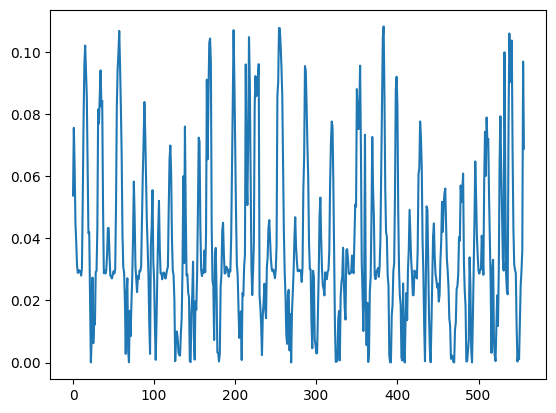

Reconstruction error threshold: 0.10831404945931207
number :  11
25/25 [==============================] - 0s 4ms/step
(777,)


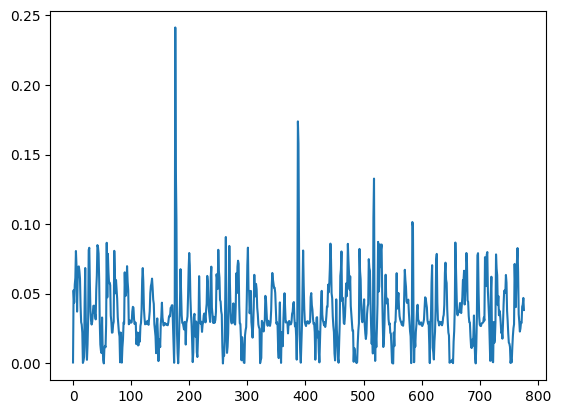

Reconstruction error threshold: 0.2413603477624873
number :  12
24/24 [==============================] - 0s 4ms/step
(757,)


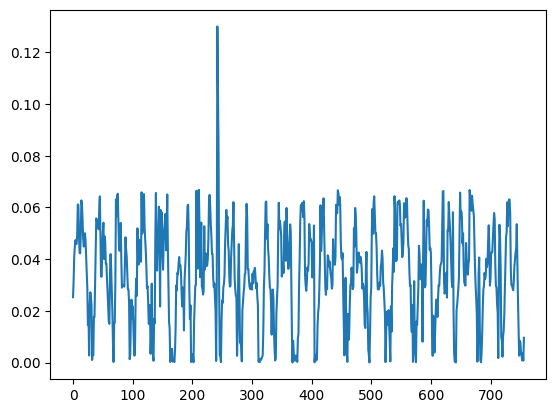

Reconstruction error threshold: 0.1300121183495299
number :  13
19/19 [==============================] - 0s 4ms/step
(578,)


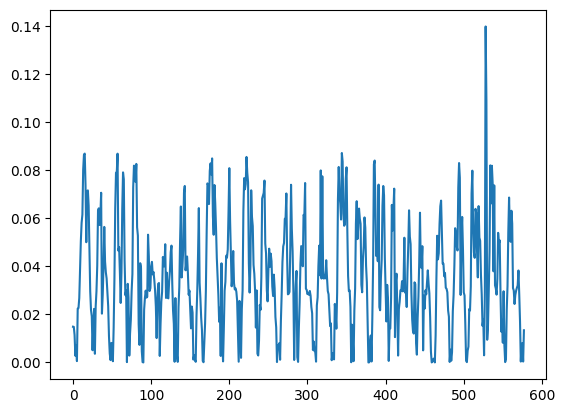

Reconstruction error threshold: 0.13974632277828225
number :  14
9/9 [==============================] - 0s 4ms/step
(280,)


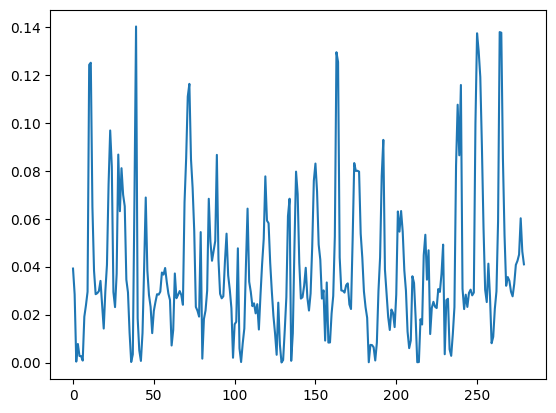

Reconstruction error threshold: 0.1401349236294308
number :  15
15/15 [==============================] - 0s 5ms/step
(463,)


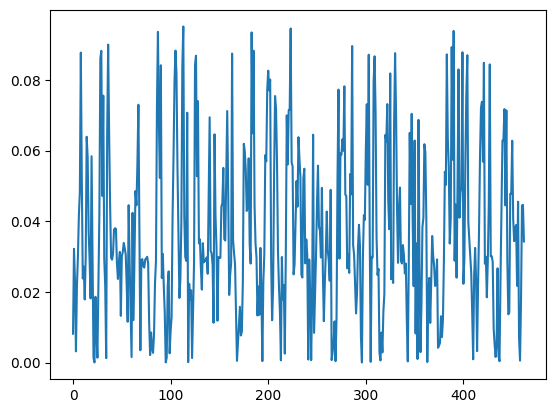

Reconstruction error threshold: 0.095102060502363
number :  16
11/11 [==============================] - 0s 4ms/step
(327,)


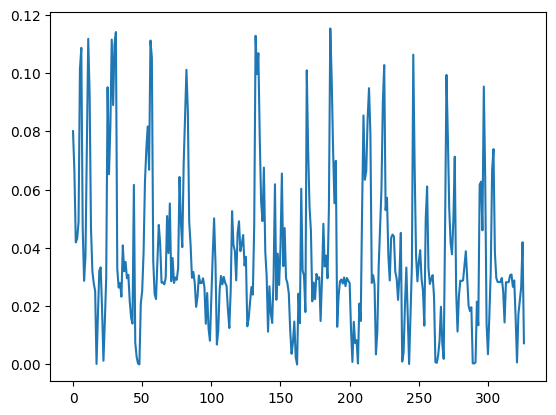

Reconstruction error threshold: 0.11537189354730101
number :  18
20/20 [==============================] - 0s 4ms/step
(623,)


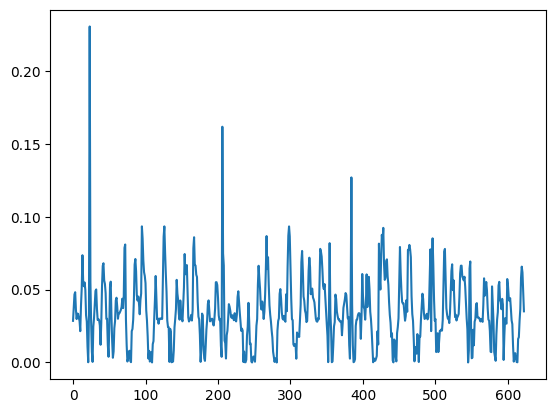

Reconstruction error threshold: 0.23068383619180555
number :  19
14/14 [==============================] - 0s 5ms/step
(441,)


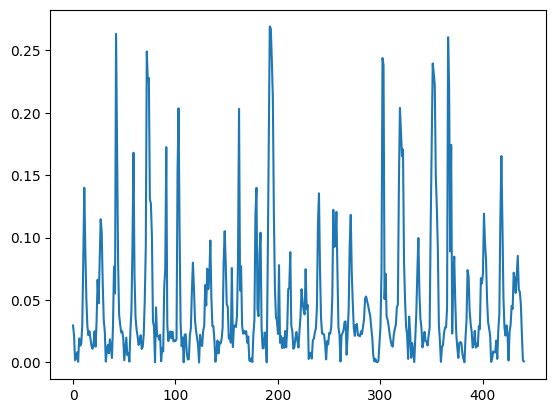

Reconstruction error threshold: 0.2690793089221716
number :  20
18/18 [==============================] - 0s 4ms/step
(567,)


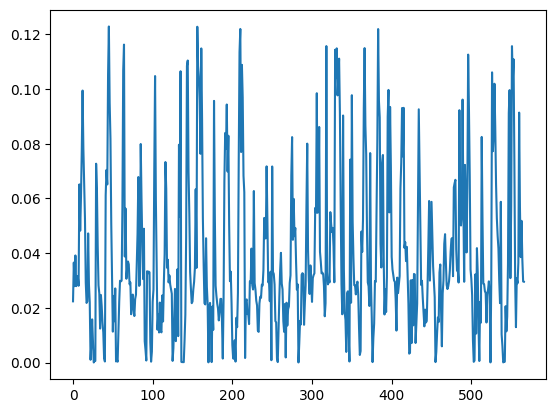

Reconstruction error threshold: 0.12292680133188626
number :  21
18/18 [==============================] - 0s 4ms/step
(553,)


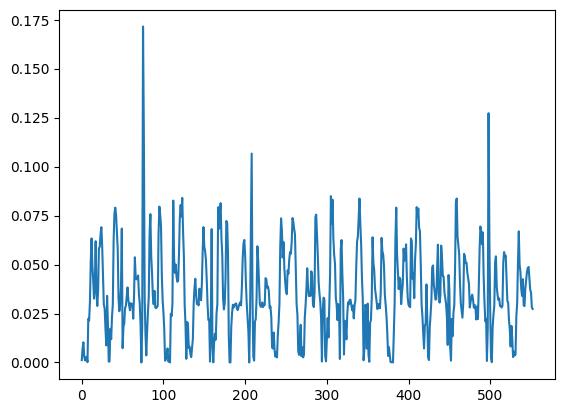

Reconstruction error threshold: 0.17153391308020552
number :  22
7/7 [==============================] - 0s 4ms/step
(207,)


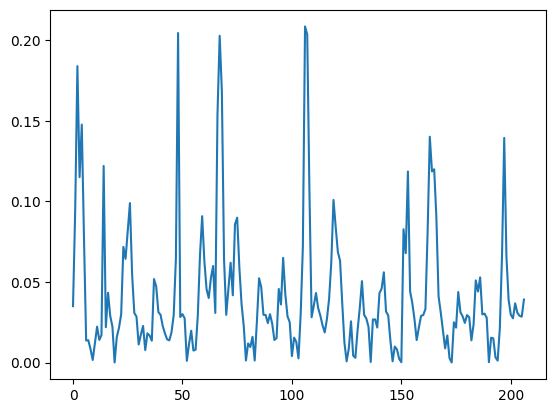

Reconstruction error threshold: 0.2085950648880639
number :  26
15/15 [==============================] - 0s 4ms/step
(457,)


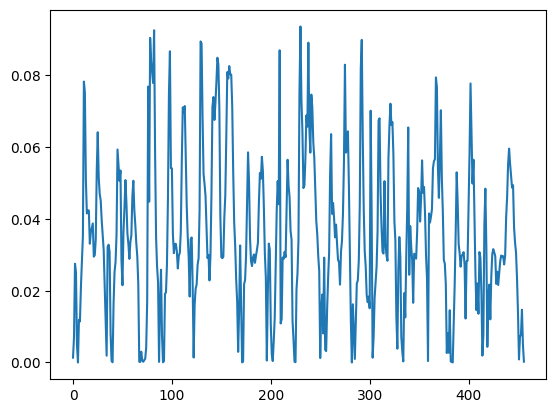

Reconstruction error threshold: 0.09361271031728285
number :  27
8/8 [==============================] - 0s 4ms/step
(240,)


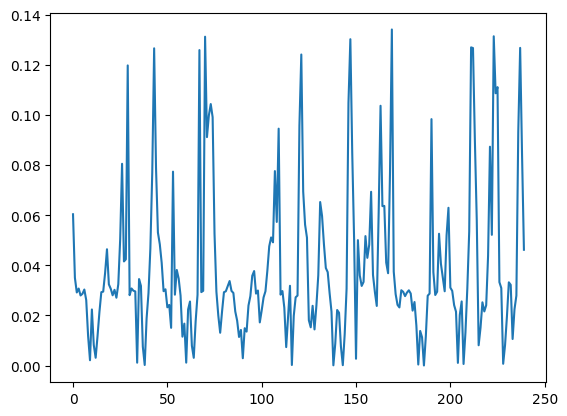

Reconstruction error threshold: 0.1340410882667548
number :  28
7/7 [==============================] - 0s 4ms/step
(199,)


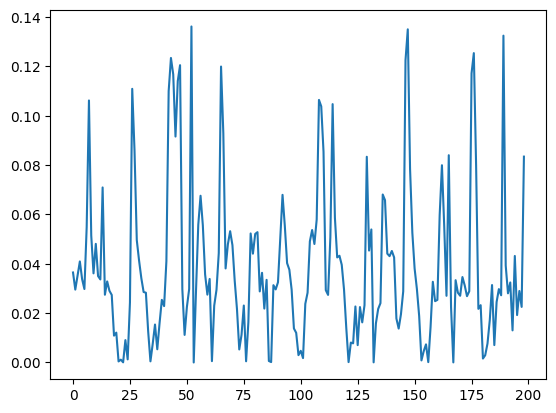

Reconstruction error threshold: 0.13615282463327594
number :  29
7/7 [==============================] - 0s 4ms/step
(197,)


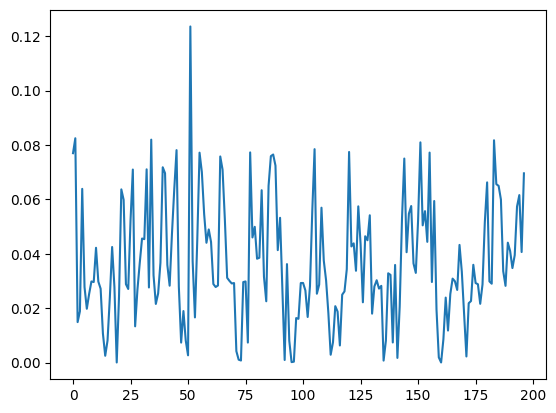

Reconstruction error threshold: 0.12354633059585107
number :  30
3/3 [==============================] - 0s 3ms/step
(70,)


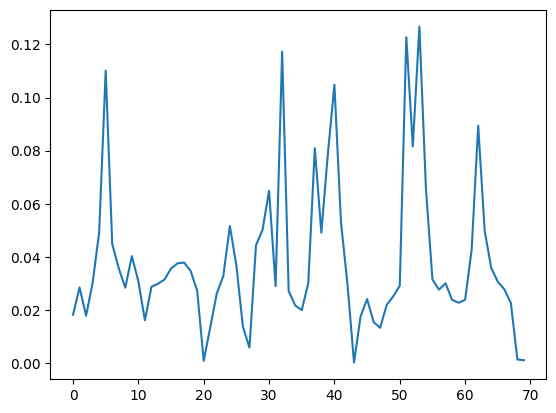

Reconstruction error threshold: 0.1267812522785222


In [17]:
threshold = []
for i in train_num:
    number_num = number[number["num"]== i].dropna()
    print("number : ",i)
    number_num = number_num[[angle]]
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
    train_x_predictions = lstm_ae.predict(number_num)
    train_mae_loss = np.mean(np.power(train_x_predictions - number_num,2), axis=1)
    train_mae_loss = train_mae_loss.flatten()
    
    print(train_mae_loss.shape)
    plt.plot(train_mae_loss)
    plt.show()
    
    train_mae_loss_max = np.max(train_mae_loss)
    threshold.append(train_mae_loss_max )
    
    print(f'Reconstruction error threshold: {train_mae_loss_max }')

In [18]:
threshold_ave = np.mean(threshold)
threshold_ave

0.15903191092647523

In [19]:
# print(epochs,"/" , lr ,"/",  threshold_ave)

=========================================================

# SA TEST

In [19]:
sar_csv = os.listdir("test/sar_long_in/")

In [55]:
# cont = 0
# for i in sar_csv:
#     path = "test/sar_long_in/"+str(i)
#     print("patient_number : ",i)
#     test_sheet = pd.read_csv(path, index_col = 0).dropna()
#     test_num = test_sheet[[angle]]
#     test_num = scaler.fit_transform(test_num)
#     test = np.reshape(test_num,(test_num.shape[0],1,1))
#     test_x_predictions = lstm_ae.predict(test)
#     test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
#     real_a_point = test_sheet['tick']
#     real_a_point_list = real_a_point.to_numpy().astype(int)

#     print(len(real_a_point_list))
#     print(len(test_mae_loss))

#     plt.plot(test_mae_loss)
#     plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
#     red = 0
#     for i in range(len(real_a_point_list)):
#         if test_mae_loss[i] >= threshold_ave:
#             plt.scatter(i, test_mae_loss[i],c='r')
#             red = 1
            
#     if red == 1:
#         cont += 1
        
#     plt.grid()
#     plt.show()
    
#     loss_max = np.max(test_mae_loss)
#     print(f'Reconstruction error threshold: {loss_max}')

-Patient_number :  03.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 142
-max_anomaly :  0.17693889539870652
-min_anomaly :  0.1606980894892127
-Anomaly Area : 0.3381563346165511
-Reconstruction error threshold : 0.17693889539870652
-Anomaly points: 3


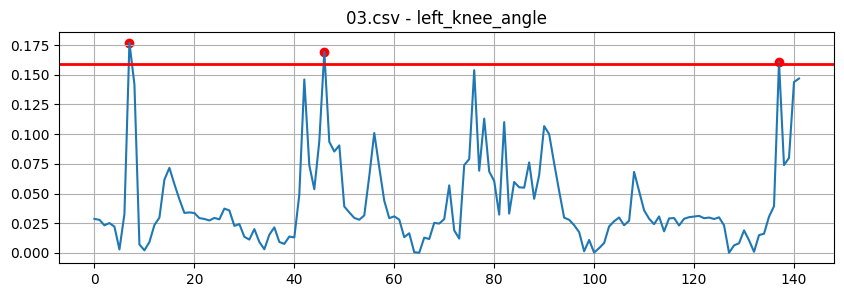

-Patient_number :  07.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 129
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08441549012165127
-Anomaly points: 0


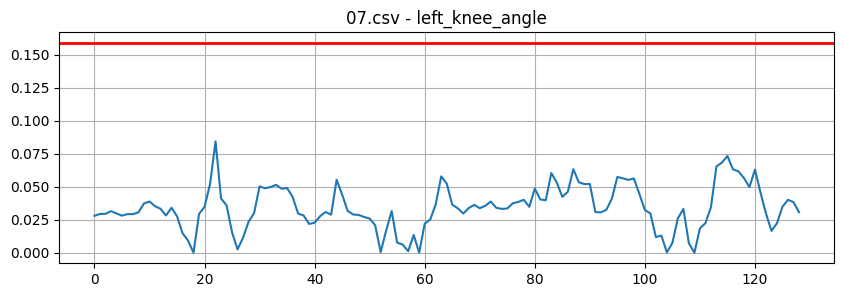

-Patient_number :  115.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 110
-max_anomaly :  0.34419506930988875
-min_anomaly :  0.16068401294737325
-Anomaly Area : 1.2095283932127707
-Reconstruction error threshold : 0.34419506930988875
-Anomaly points: 6


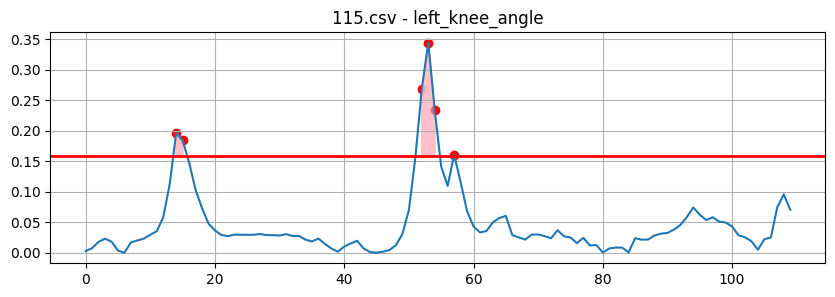

-Patient_number :  120.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 249
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09515013824309493
-Anomaly points: 0


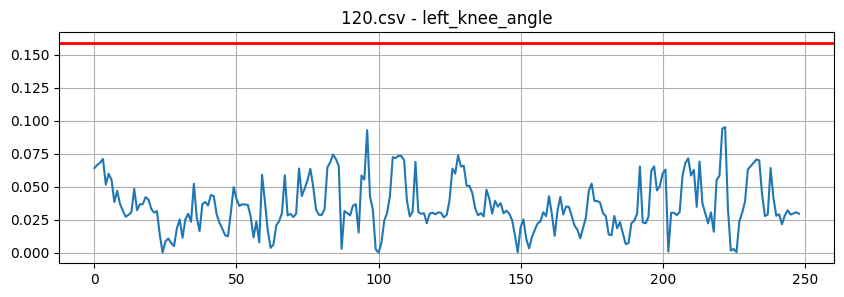

-Patient_number :  123.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 157
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15301783551295034
-Anomaly points: 0


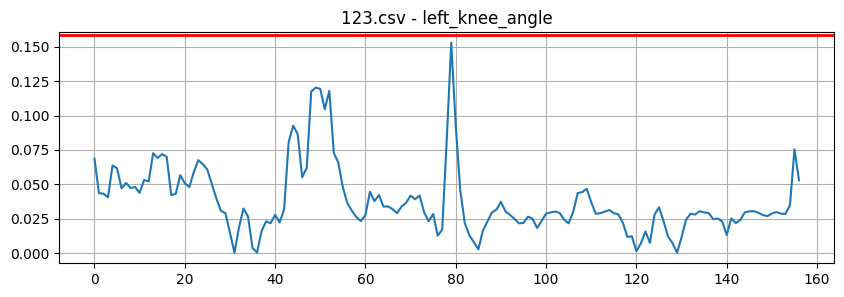

-Patient_number :  141.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 176
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.35200167838812757
-Anomaly points: 1


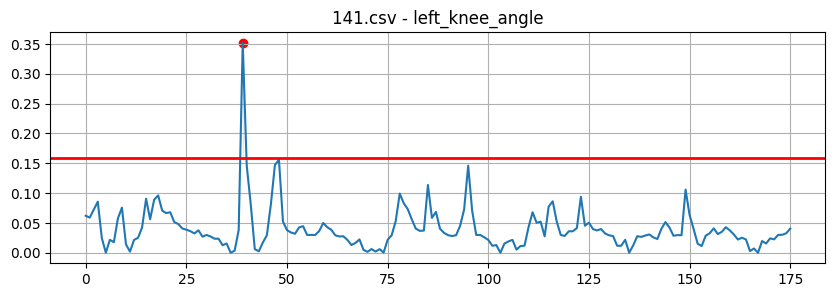

-Patient_number :  143.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 178
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2216076427975907
-Anomaly points: 1


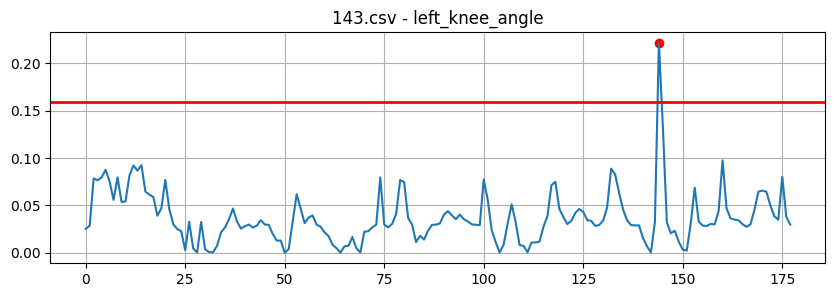

-Patient_number :  151.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 239
-max_anomaly :  0.24343822595058662
-min_anomaly :  0.16272308180282133
-Anomaly Area : 2.8159925837720063
-Reconstruction error threshold : 0.24343822595058662
-Anomaly points: 15


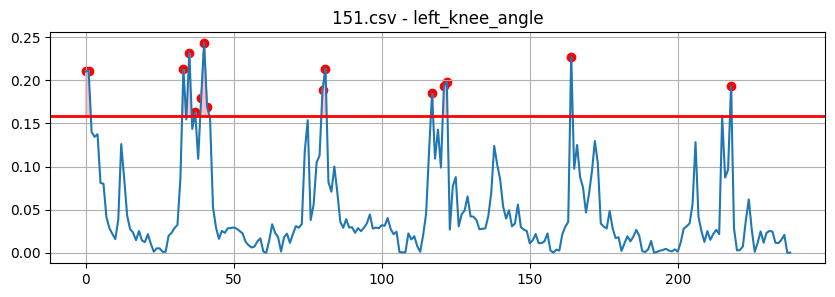

-Patient_number :  154.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 230
-max_anomaly :  0.19648246023590013
-min_anomaly :  0.16074593603820228
-Anomaly Area : 0.7064996696987227
-Reconstruction error threshold : 0.19648246023590013
-Anomaly points: 5


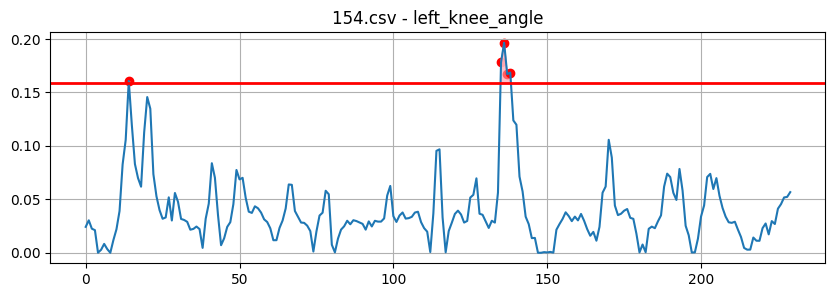

-Patient_number :  166.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 202
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.16721766982485675
-Anomaly points: 1


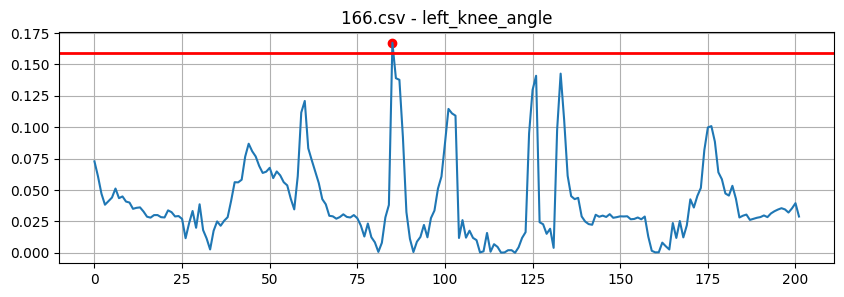

-Patient_number :  178.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 233
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17764070247453698
-Anomaly points: 1


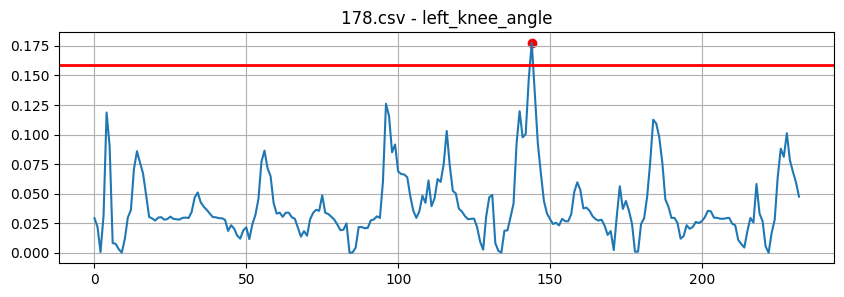

-Patient_number :  189.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.28241782657058284
-Anomaly points: 1


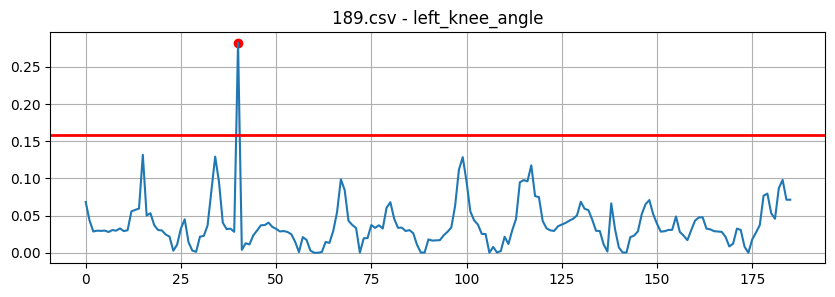

-Patient_number :  195.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 108
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11780204236179577
-Anomaly points: 0


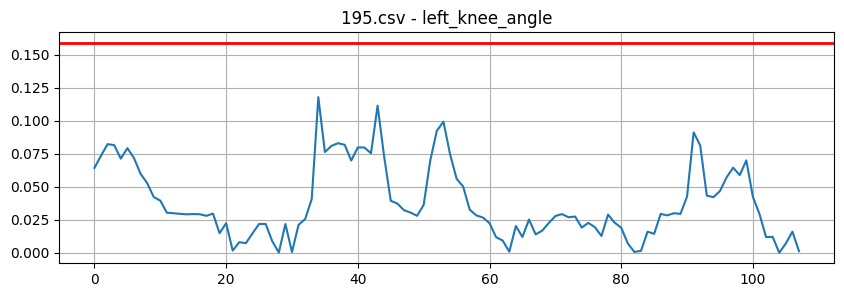

-Patient_number :  198.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 207
-max_anomaly :  0.4141373650089615
-min_anomaly :  0.18317259849712314
-Anomaly Area : 0.6420279280810837
-Reconstruction error threshold : 0.4141373650089615
-Anomaly points: 3


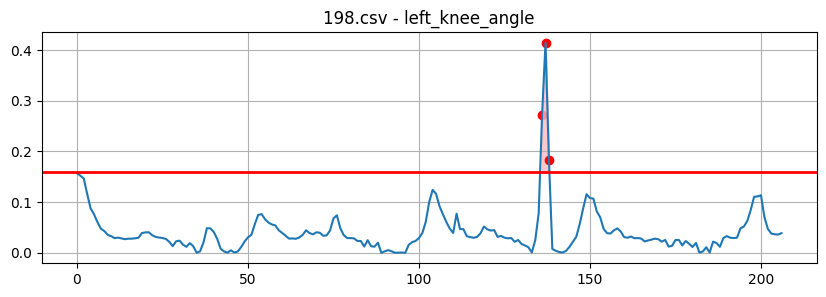

-Patient_number :  199.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 210
-max_anomaly :  0.9615044602648647
-min_anomaly :  0.22403022201720496
-Anomaly Area : 1.282322798520044
-Reconstruction error threshold : 0.9615044602648647
-Anomaly points: 3


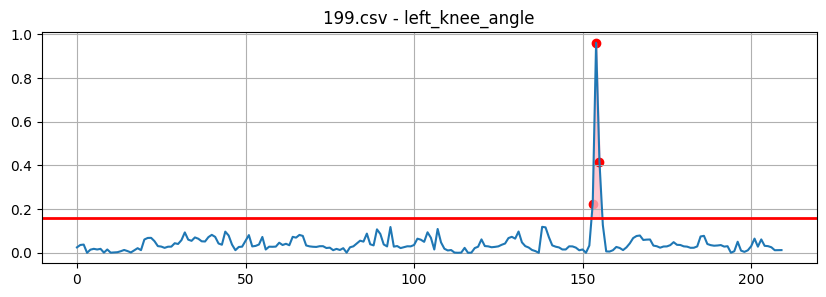

-Patient_number :  206.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 227
-max_anomaly :  0.29982631223059203
-min_anomaly :  0.1647394280395528
-Anomaly Area : 0.7792422292686143
-Reconstruction error threshold : 0.29982631223059203
-Anomaly points: 4


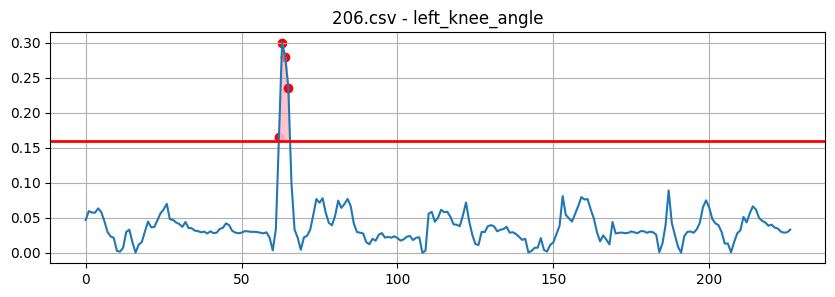

-Patient_number :  208.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 182
-max_anomaly :  0.3586534649342622
-min_anomaly :  0.2166551058369116
-Anomaly Area : 0.2876542853855869
-Reconstruction error threshold : 0.3586534649342622
-Anomaly points: 2


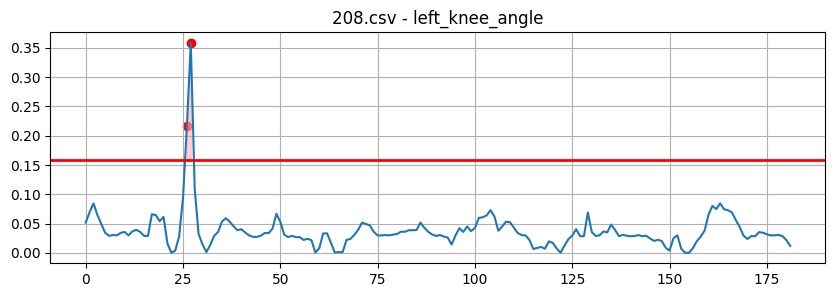

-Patient_number :  209.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 126
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.14850406311548967
-Anomaly points: 0


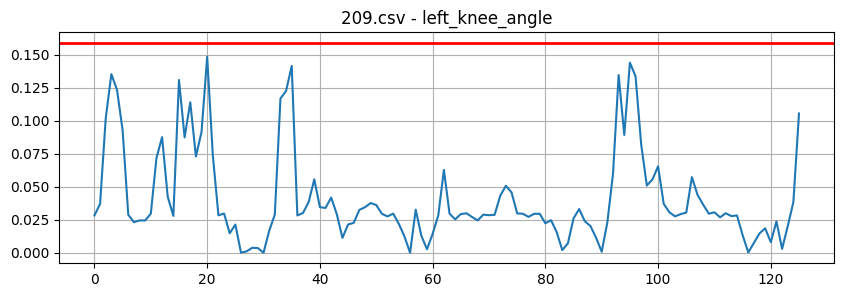

-Patient_number :  216.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 111
-max_anomaly :  0.2690020294849954
-min_anomaly :  0.163413755458704
-Anomaly Area : 1.610737924131862
-Reconstruction error threshold : 0.2690020294849954
-Anomaly points: 9


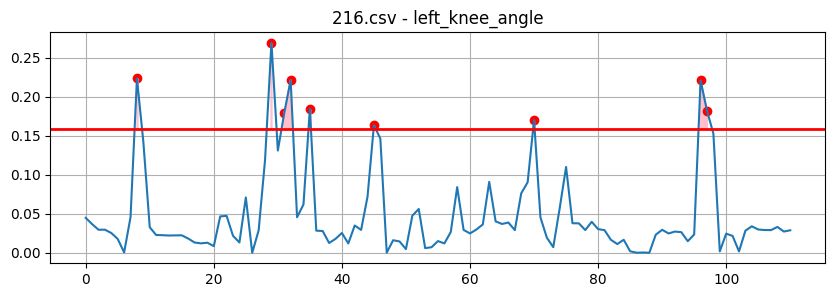

-Patient_number :  23.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 146
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09198035011014849
-Anomaly points: 0


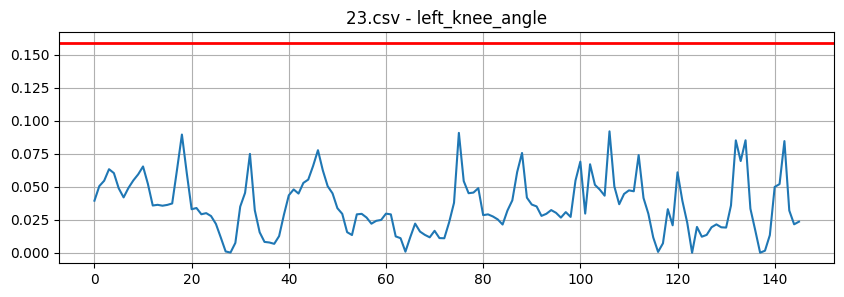

-Patient_number :  230.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 229
-max_anomaly :  0.2896507641652506
-min_anomaly :  0.171839294630784
-Anomaly Area : 1.2369437398351835
-Reconstruction error threshold : 0.2896507641652506
-Anomaly points: 7


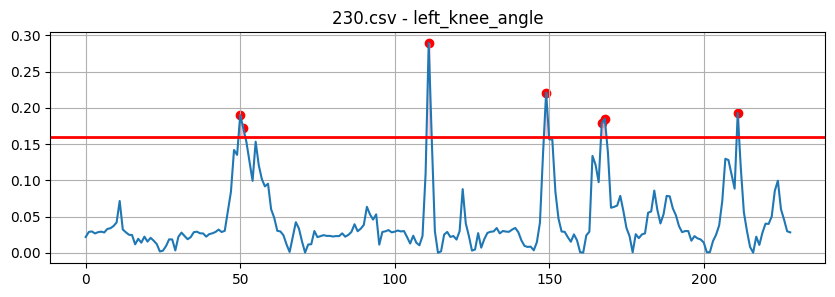

-Patient_number :  244.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 198
-max_anomaly :  0.2400271146726812
-min_anomaly :  0.16811707433157655
-Anomaly Area : 0.8494195792487913
-Reconstruction error threshold : 0.2400271146726812
-Anomaly points: 5


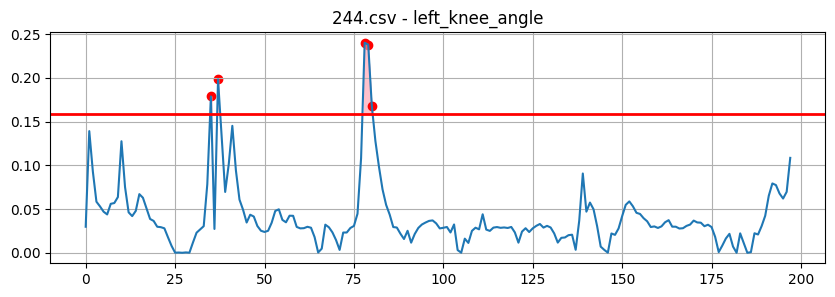

-Patient_number :  264.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 254
-max_anomaly :  0.28211260498317087
-min_anomaly :  0.16106799218963785
-Anomaly Area : 1.4505922678480117
-Reconstruction error threshold : 0.28211260498317087
-Anomaly points: 9


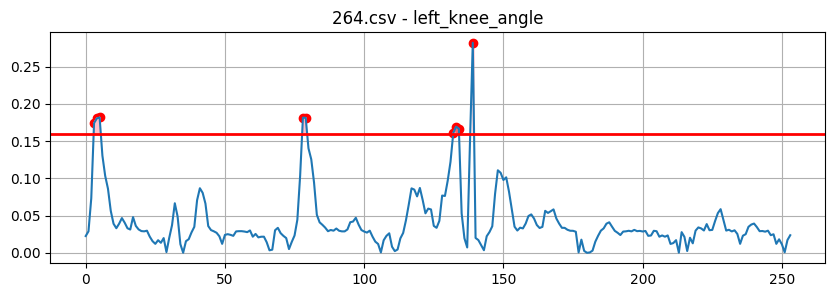

-Patient_number :  275.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 264
-max_anomaly :  0.24883234728856454
-min_anomaly :  0.1593170888135481
-Anomaly Area : 2.8547718401825586
-Reconstruction error threshold : 0.24883234728856454
-Anomaly points: 17


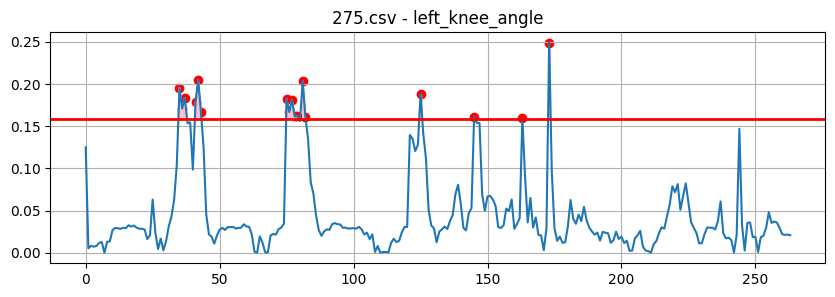

-Patient_number :  278.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 292
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11323112559081919
-Anomaly points: 0


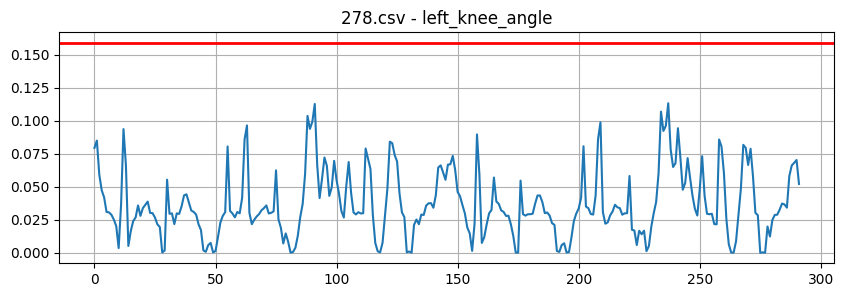

-Patient_number :  28.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 248
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.20527753407488375
-Anomaly points: 1


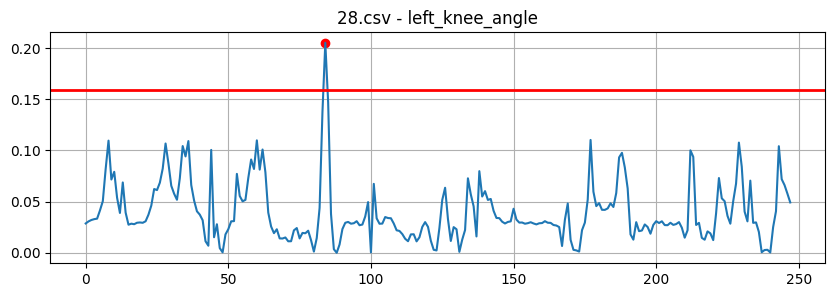

-Patient_number :  284.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 122
-max_anomaly :  0.28887791659983875
-min_anomaly :  0.16510503114723227
-Anomaly Area : 1.2792500287171091
-Reconstruction error threshold : 0.28887791659983875
-Anomaly points: 7


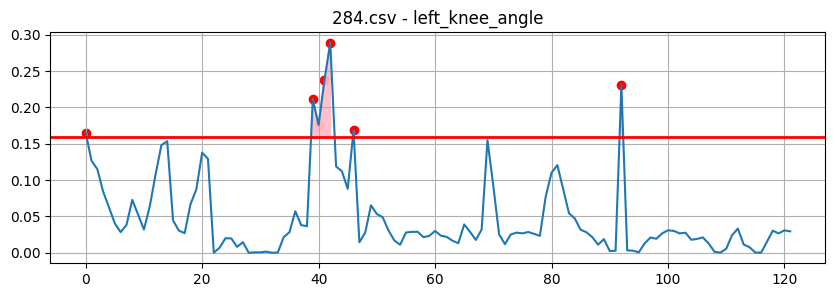

-Patient_number :  285.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 235
-max_anomaly :  0.6543226911125125
-min_anomaly :  0.16138549285360754
-Anomaly Area : 2.241489253422594
-Reconstruction error threshold : 0.6543226911125125
-Anomaly points: 6


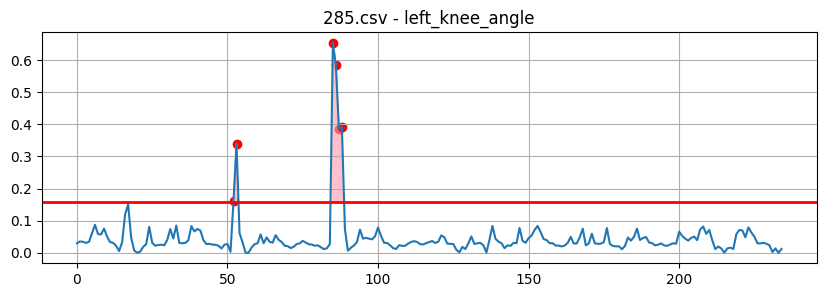

-Patient_number :  286.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 162
-max_anomaly :  0.23542331337814446
-min_anomaly :  0.1821422853509035
-Anomaly Area : 0.40266152516633924
-Reconstruction error threshold : 0.23542331337814446
-Anomaly points: 3


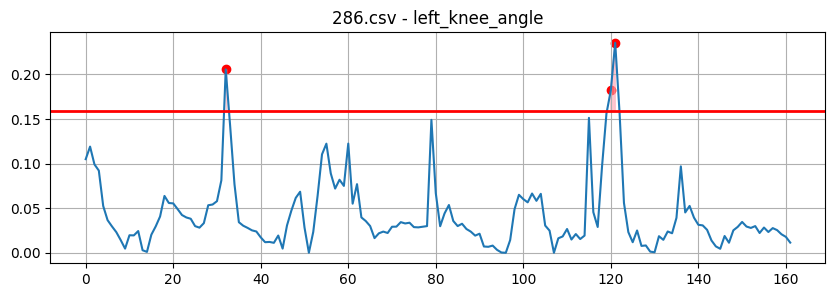

-Patient_number :  287.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 234
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1441878586746838
-Anomaly points: 0


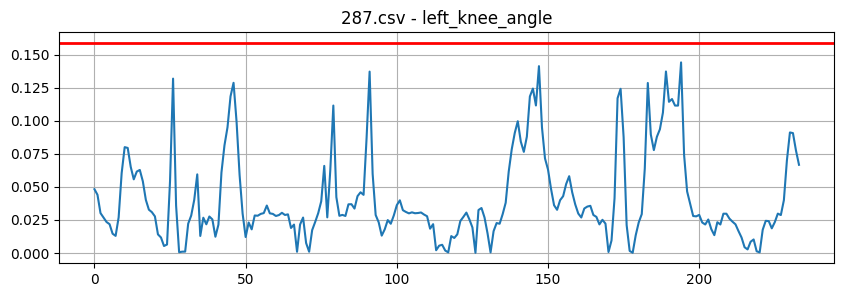

-Patient_number :  298.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 168
-max_anomaly :  0.19691013079951789
-min_anomaly :  0.16351617440378366
-Anomaly Area : 0.3529726397077849
-Reconstruction error threshold : 0.19691013079951789
-Anomaly points: 3


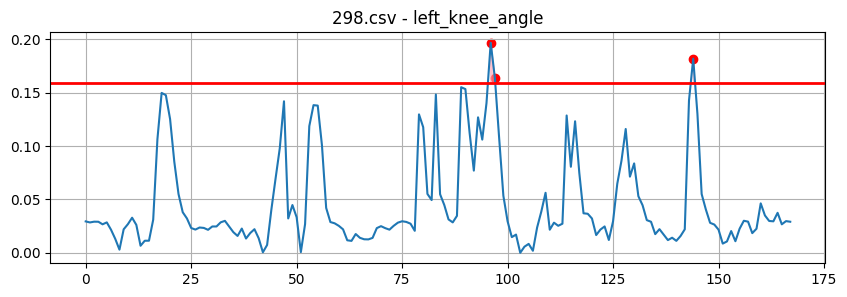

-Patient_number :  333.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 246
-max_anomaly :  0.6480375097219057
-min_anomaly :  0.15968097407309748
-Anomaly Area : 6.840146695588437
-Reconstruction error threshold : 0.6480375097219057
-Anomaly points: 19


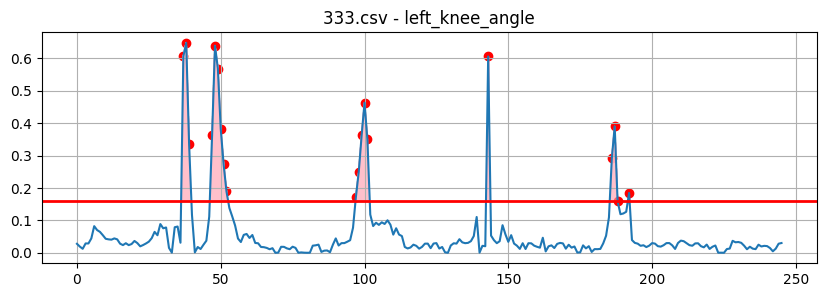

-Patient_number :  337.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 172
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.07552261534579884
-Anomaly points: 0


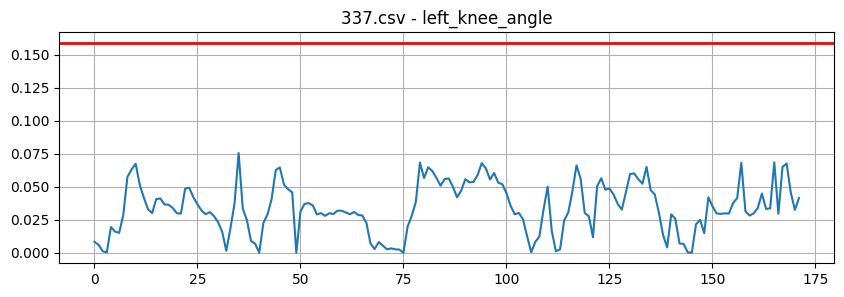

-Patient_number :  338.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 152
-max_anomaly :  0.33710067373791697
-min_anomaly :  0.16358188272653112
-Anomaly Area : 3.4544125180944887
-Reconstruction error threshold : 0.33710067373791697
-Anomaly points: 16


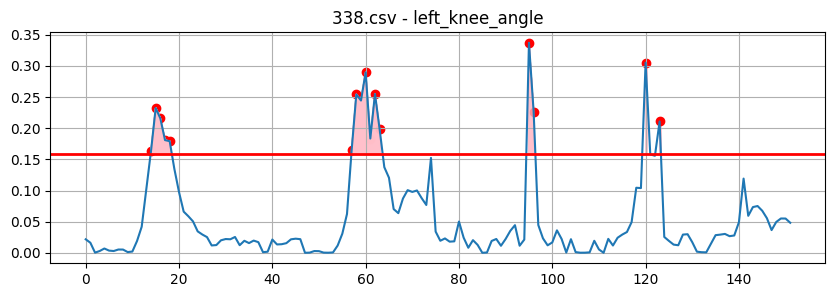

-Patient_number :  340.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 165
-max_anomaly :  1.463398426854297
-min_anomaly :  0.184016897364066
-Anomaly Area : 7.551534658818491
-Reconstruction error threshold : 1.463398426854297
-Anomaly points: 18


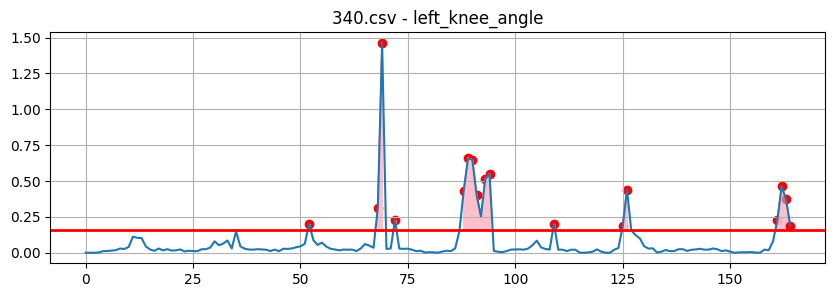

-Patient_number :  341.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 183
-max_anomaly :  0.2786079841191132
-min_anomaly :  0.16396522553933493
-Anomaly Area : 2.117408318467521
-Reconstruction error threshold : 0.2786079841191132
-Anomaly points: 11


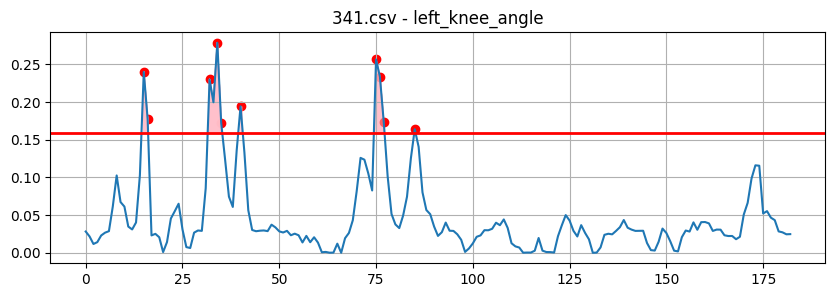

-Patient_number :  344.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15245197960739224
-Anomaly points: 0


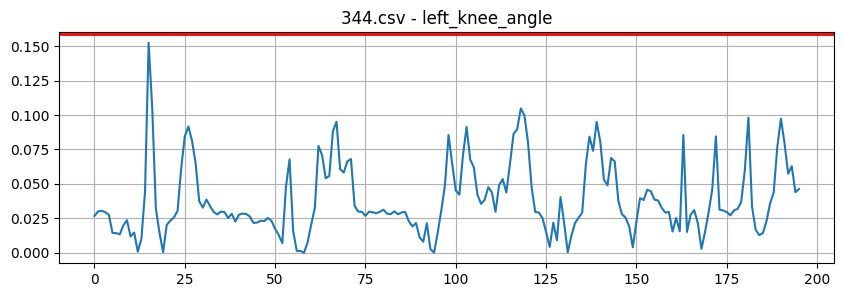

-Patient_number :  354.csv
9/9 [==============================] - 0s 5ms/step
-Data len : 263
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.19530722698127426
-Anomaly points: 1


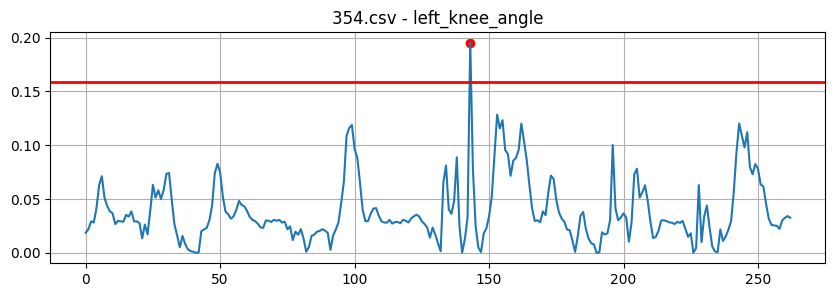

-Patient_number :  356.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 228
-max_anomaly :  0.25195118720149096
-min_anomaly :  0.16294723644666045
-Anomaly Area : 0.37224805623601415
-Reconstruction error threshold : 0.25195118720149096
-Anomaly points: 3


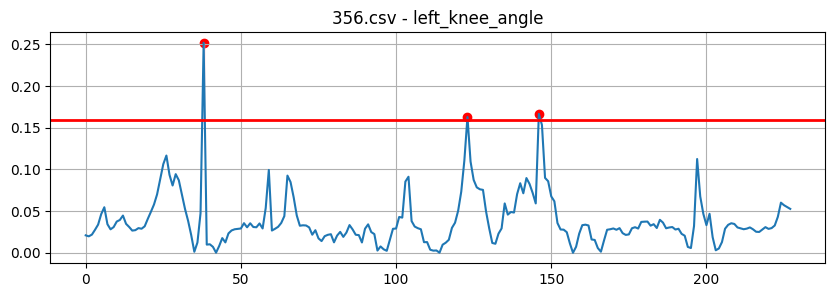

-Patient_number :  358.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 236
-max_anomaly :  0.7862272500141331
-min_anomaly :  0.2951337544953056
-Anomaly Area : 0.5406805022547193
-Reconstruction error threshold : 0.7862272500141331
-Anomaly points: 2


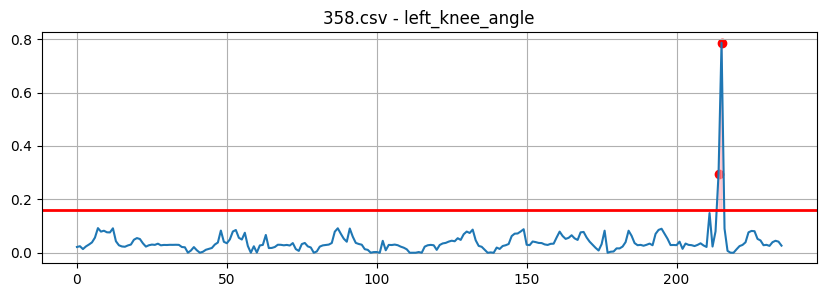

-Patient_number :  36.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 215
-max_anomaly :  0.7957341918959632
-min_anomaly :  0.16677876552617124
-Anomaly Area : 2.5475378644466047
-Reconstruction error threshold : 0.7957341918959632
-Anomaly points: 7


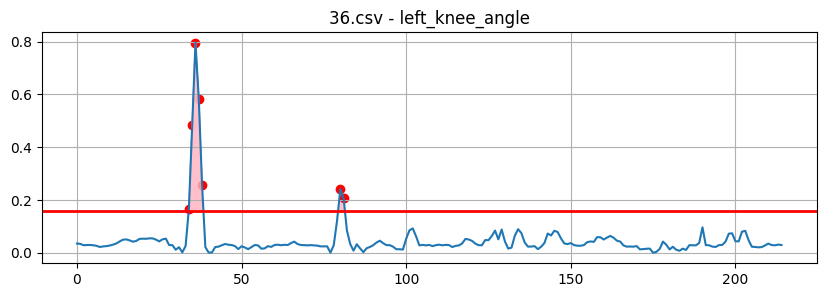

-Patient_number :  360.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 186
-max_anomaly :  0.20631255043374622
-min_anomaly :  0.15907290107320074
-Anomaly Area : 0.7180497464737797
-Reconstruction error threshold : 0.20631255043374622
-Anomaly points: 5


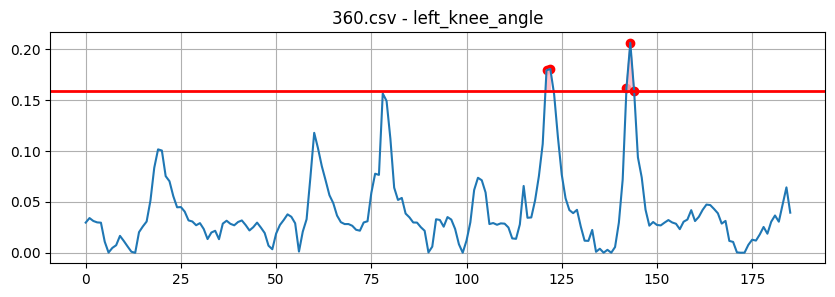

-Patient_number :  364.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 195
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10251624748004648
-Anomaly points: 0


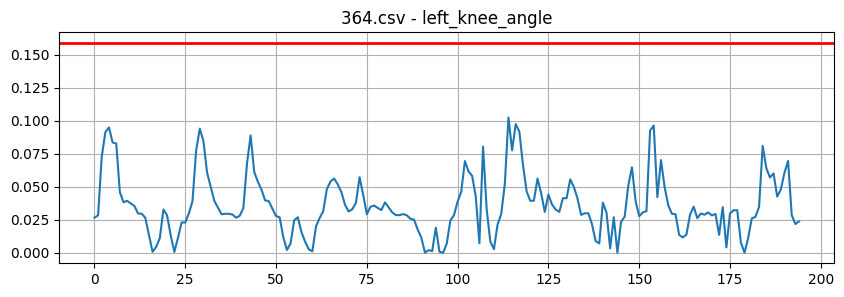

-Patient_number :  365.csv
2/2 [==============================] - 0s 4ms/step
-Data len : 63
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0760066777750325
-Anomaly points: 0


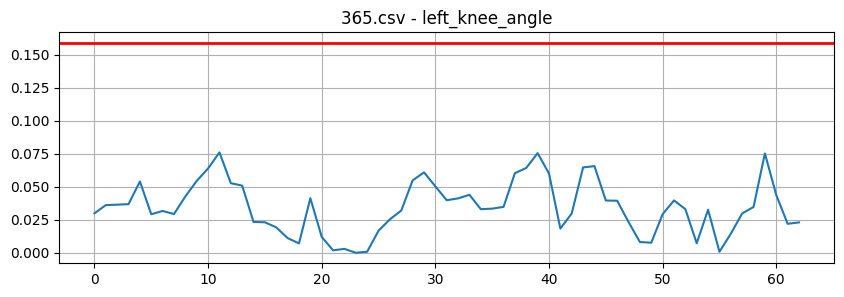

-Patient_number :  367.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 259
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08448329111833694
-Anomaly points: 0


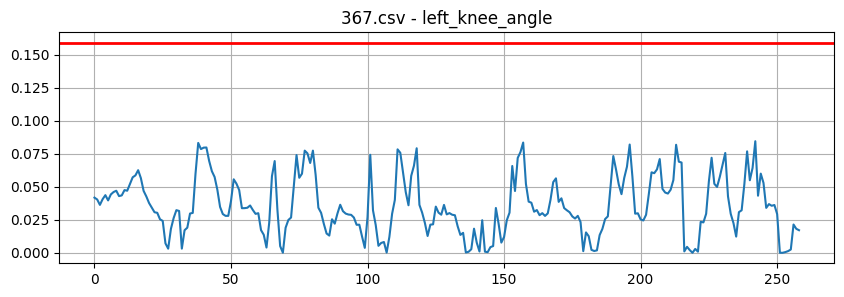

-Patient_number :  369.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 134
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.18786879172783602
-Anomaly points: 1


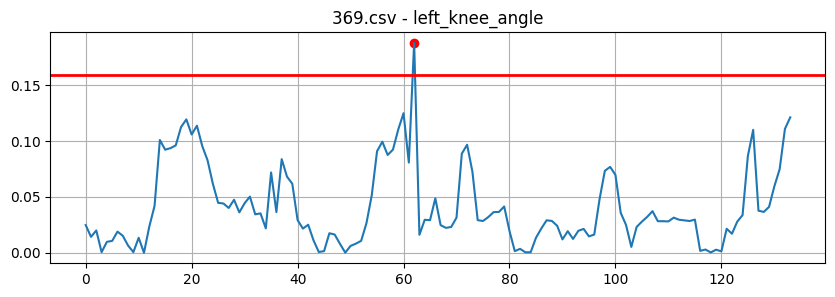

-Patient_number :  391.csv
12/12 [==============================] - 0s 4ms/step
-Data len : 362
-max_anomaly :  0.23199754833202665
-min_anomaly :  0.16408926020064643
-Anomaly Area : 0.9920932387335364
-Reconstruction error threshold : 0.23199754833202665
-Anomaly points: 6


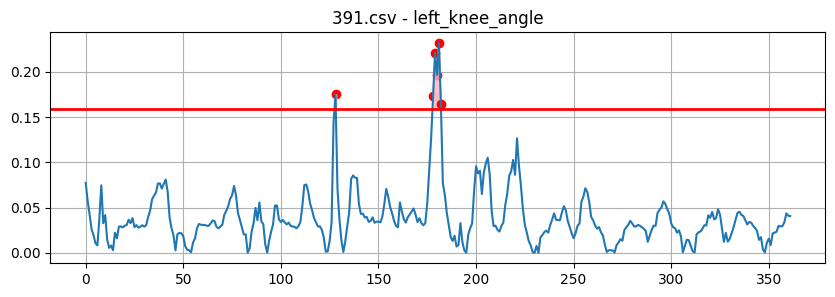

-Patient_number :  398.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 238
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11682979971119963
-Anomaly points: 0


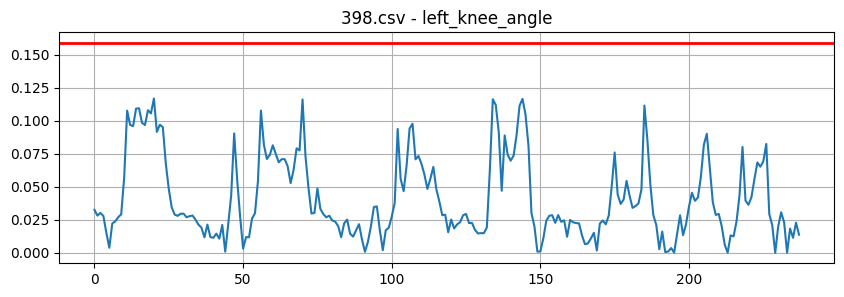

-Patient_number :  400.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 148
-max_anomaly :  0.2513550970416724
-min_anomaly :  0.1638512661663883
-Anomaly Area : 0.4254318494731871
-Reconstruction error threshold : 0.2513550970416724
-Anomaly points: 3


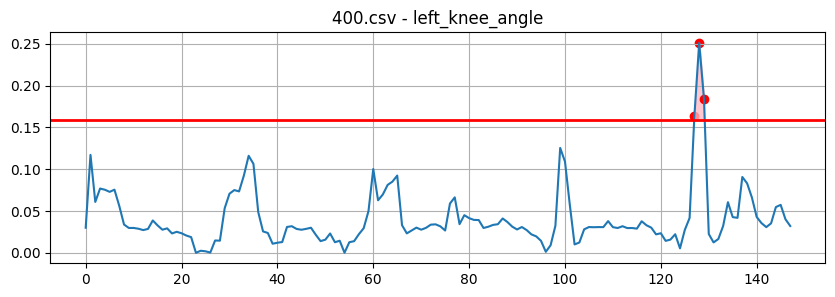

-Patient_number :  412.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 128
-max_anomaly :  0.17307391008145379
-min_anomaly :  0.1637716422704268
-Anomaly Area : 0.3384444149599213
-Reconstruction error threshold : 0.17307391008145379
-Anomaly points: 3


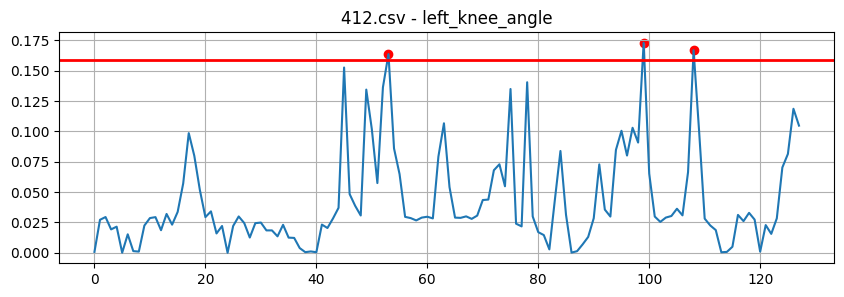

-Patient_number :  414.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 135
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12171970495125353
-Anomaly points: 0


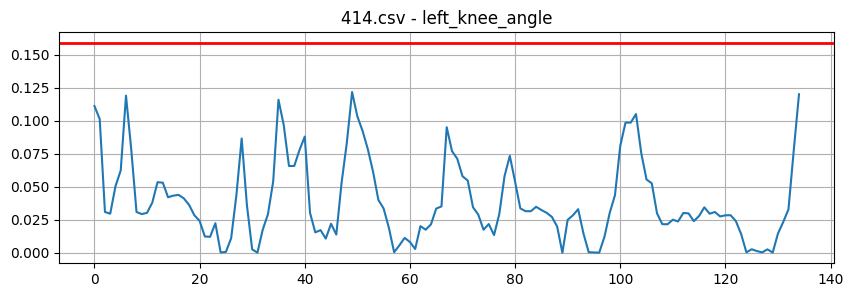

-Patient_number :  420.csv
3/3 [==============================] - 0s 4ms/step
-Data len : 95
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.141797270331694
-Anomaly points: 0


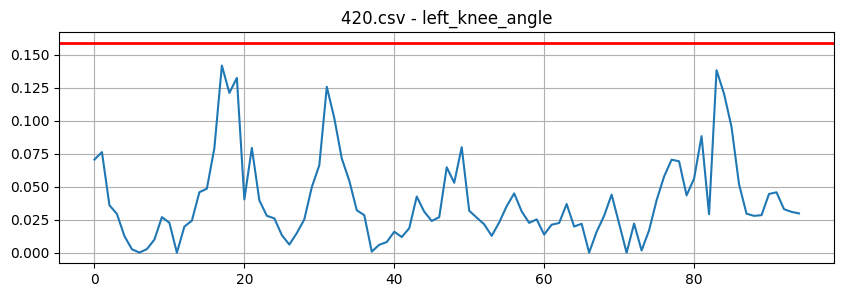

-Patient_number :  423.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 121
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1293723559170579
-Anomaly points: 0


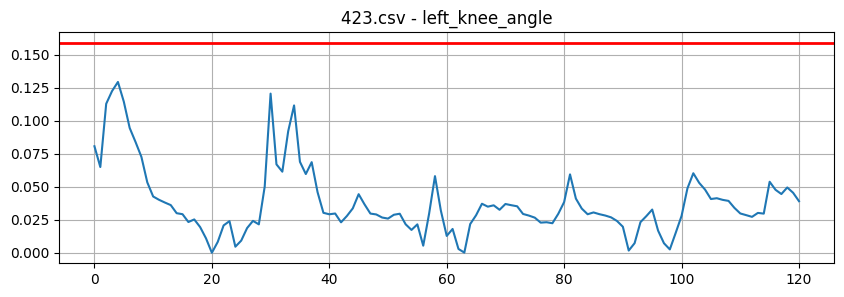

-Patient_number :  428.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-max_anomaly :  0.35652435536093674
-min_anomaly :  0.16643136247617552
-Anomaly Area : 0.7359430294280842
-Reconstruction error threshold : 0.35652435536093674
-Anomaly points: 4


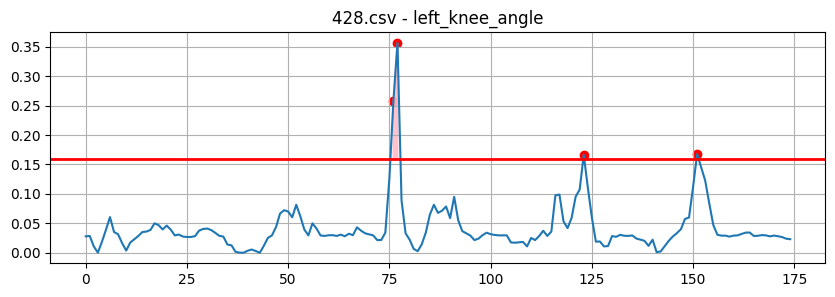

-Patient_number :  43.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-max_anomaly :  0.27656380564367244
-min_anomaly :  0.15909985823944234
-Anomaly Area : 2.019085394418206
-Reconstruction error threshold : 0.27656380564367244
-Anomaly points: 11


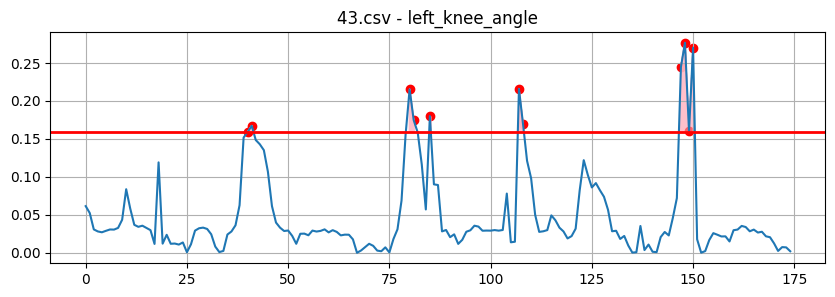

-Patient_number :  432.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 173
-max_anomaly :  0.4450688461887757
-min_anomaly :  0.20874662657728812
-Anomaly Area : 0.6640201608400886
-Reconstruction error threshold : 0.4450688461887757
-Anomaly points: 3


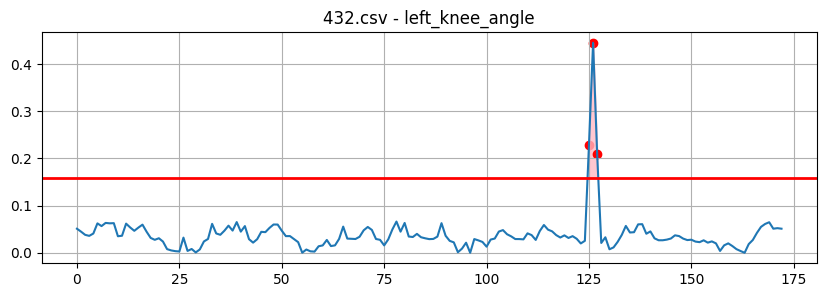

-Patient_number :  436.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 302
-max_anomaly :  0.3386205748383723
-min_anomaly :  0.160348602254186
-Anomaly Area : 0.5166938999339955
-Reconstruction error threshold : 0.3386205748383723
-Anomaly points: 3


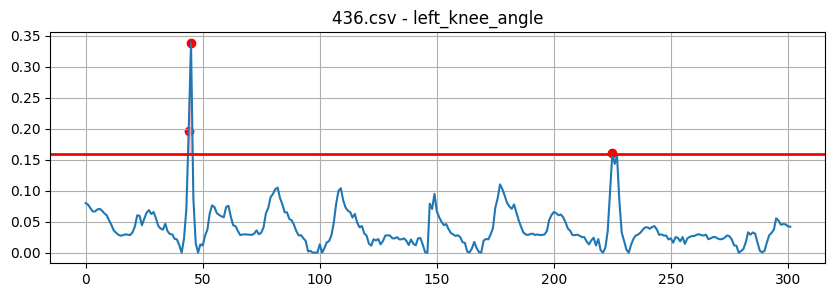

-Patient_number :  445.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4154177523499802
-Anomaly points: 1


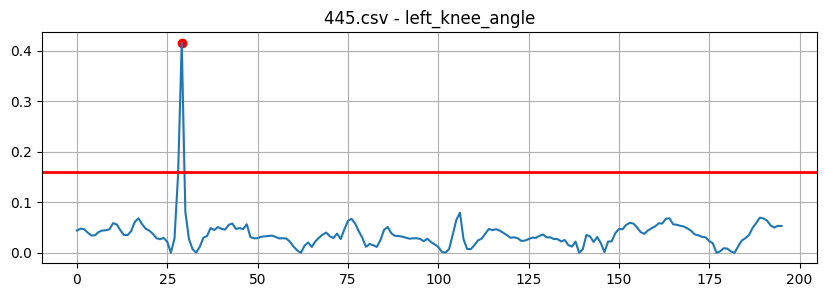

-Patient_number :  56.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 219
-max_anomaly :  0.21811441592573486
-min_anomaly :  0.1621258164510366
-Anomaly Area : 2.879120237684911
-Reconstruction error threshold : 0.21811441592573486
-Anomaly points: 16


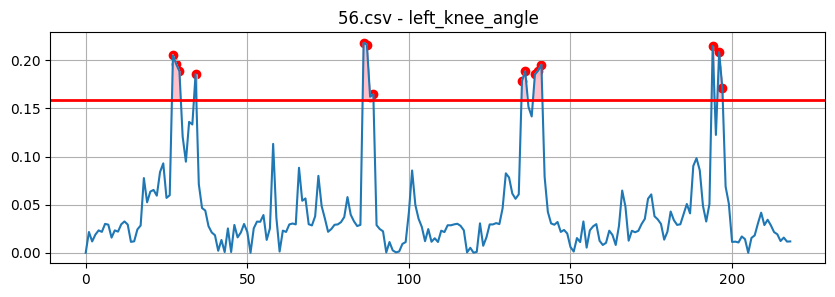

-Patient_number :  61.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 101
-max_anomaly :  0.27434170487190057
-min_anomaly :  0.1606593134032025
-Anomaly Area : 1.5008199831346396
-Reconstruction error threshold : 0.27434170487190057
-Anomaly points: 8


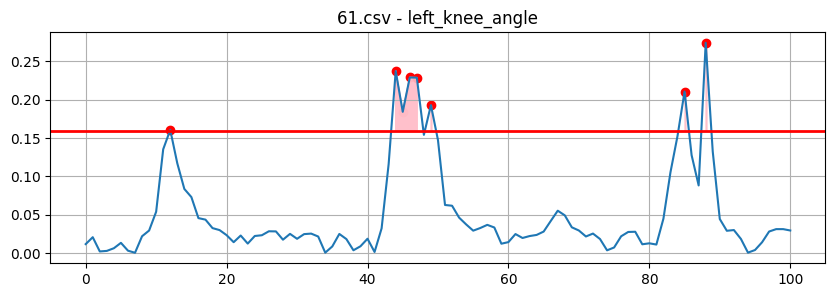

-Patient_number :  84.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 217
-max_anomaly :  0.17929913387022212
-min_anomaly :  0.15979463144309586
-Anomaly Area : 0.4942073941228095
-Reconstruction error threshold : 0.17929913387022212
-Anomaly points: 4


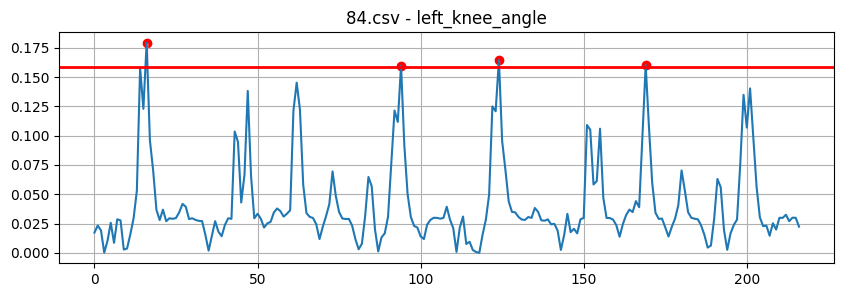

-Patient_number :  85.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 131
-max_anomaly :  0.19552901148776025
-min_anomaly :  0.16647565326103067
-Anomaly Area : 0.35220270410637067
-Reconstruction error threshold : 0.19552901148776025
-Anomaly points: 3


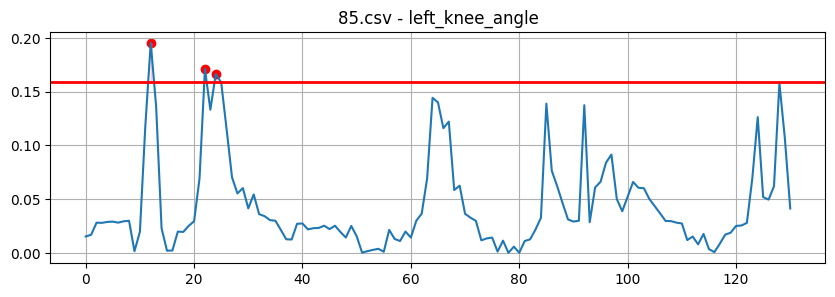

-Patient_number :  91.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 232
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15318858718885828
-Anomaly points: 0


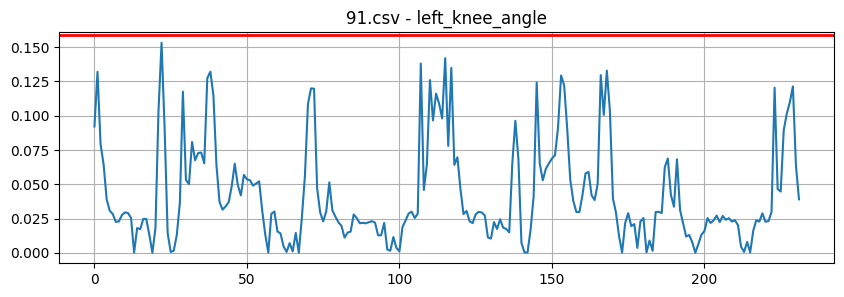

-Patient_number :  97.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 188
-max_anomaly :  0.2056505383785203
-min_anomaly :  0.15953835492706248
-Anomaly Area : 1.1693043501538531
-Reconstruction error threshold : 0.2056505383785203
-Anomaly points: 8


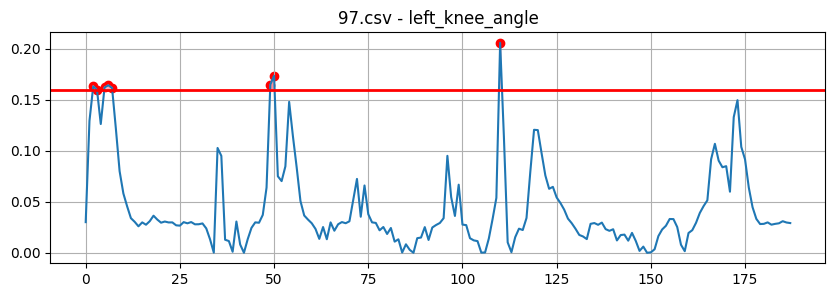

In [20]:
# inte_li = []
# indices = []
data_len = []
total_anomaly = []
total_anomaly_area = []
cont=0

sar_csv = os.listdir("test/sar_long_in/")

for i in sar_csv:
    print("====================================================================================================")
    path = "test/sar_long_in/"+str(i)
    print("-Patient_number : ",i)
    
    test_sheet = pd.read_csv(path, index_col = 0).dropna()
    test_num = test_sheet[[angle]]
    test_num = scaler.fit_transform(test_num)
    test = np.reshape(test_num,(test_num.shape[0],1,1))
    test_x_predictions = lstm_ae.predict(test)
    test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
    real_a_point = test_sheet['tick']
    real_a_point_list = real_a_point.to_numpy().astype(int)
    
    ra = len(real_a_point_list)
    ta=len(test_mae_loss)
    
    if ra == ta:
        print("-Data len :",ta)
    
    data_len.append(ta)

    plt.figure(figsize = (10,3))
    plt.plot(test_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
    red_t = [] # 이상치 갯수 리스트 
    inte_li = []
    indices = []
    data_len = []
    

    red = 0
    
    for j in range(len(real_a_point_list)):
        
        if test_mae_loss[j] >= threshold_ave:
            above_threshold = test_mae_loss >= threshold_ave
            below_threshold = np.logical_not(above_threshold)
            plt.fill_between(np.arange(len(test_mae_loss)), test_mae_loss, threshold_ave, where=above_threshold, color='pink', alpha=0.5) #임계갓 윗 부분
            # plt.fill_betweenx(y=[0,threshold_ave], x1=j, x2=j+1, color='pink') #임계갓 아랫 부분 
            plt.scatter(j, test_mae_loss[j],c='r')
            red = 1
            inte = (test_mae_loss[j])

            inte_li.append(inte) # 이상치 값
            red_t.append(red) # 이상치 갯수 카운트 
            indices.append(j) # 이상치 인덱스 
            total_anomaly.append(inte)
            
    # print("-Anomaly_data : ",inte_li)
    
    if len(red_t) >= 2:
        print("-max_anomaly : ",max(inte_li))
        print("-min_anomaly : ",min(inte_li))

        
    # if len(red_t) <= 10:
    #     print("-중증도 : 1단계")
    # elif len(red_t) >= 10:
    #     print("-중증도 : 2단계")
    # else:
    #     print("-중증도 : 3단계")
    
    if red == 1:
        cont += 1
    
    loss_max = np.max(test_mae_loss)
    anomaly_area = np.trapz(inte_li)
    # total_anomaly_area.append(anomaly_area)
    
    plt.title(i + " - " + angle)
    plt.grid()
    name = i[:-4]
    # plt.savefig(name)
    
    print("-Anomaly Area :", anomaly_area)
    print(f'-Reconstruction error threshold : {loss_max}')
    print("-Anomaly points:",len(red_t))
    
    
    plt.show()


In [23]:
print("이상탐지 환자 수 : ",cont)

이상탐지 환자 수 :  46


=========================================================

# Nomal TEST

In [21]:
# Nomal TEST

14/14 [==============================] - 0s 4ms/step
433


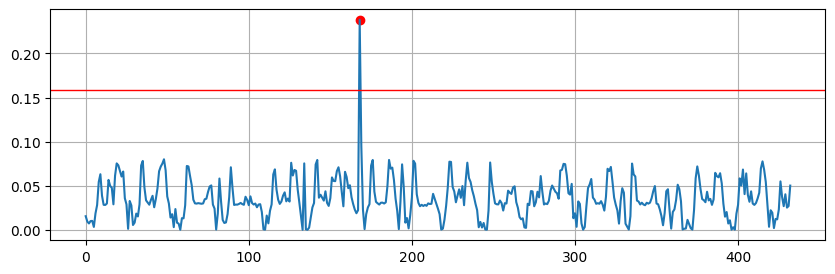

13/13 [==============================] - 0s 4ms/step
397


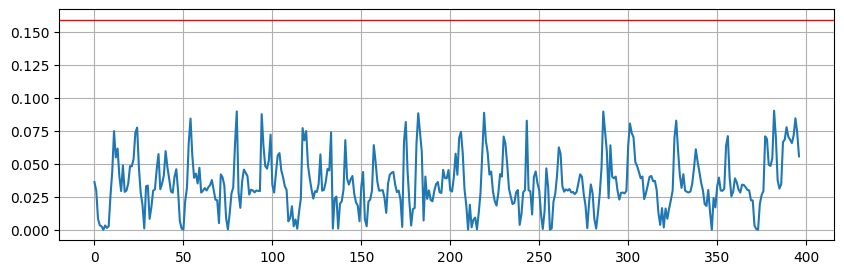

13/13 [==============================] - 0s 4ms/step
405


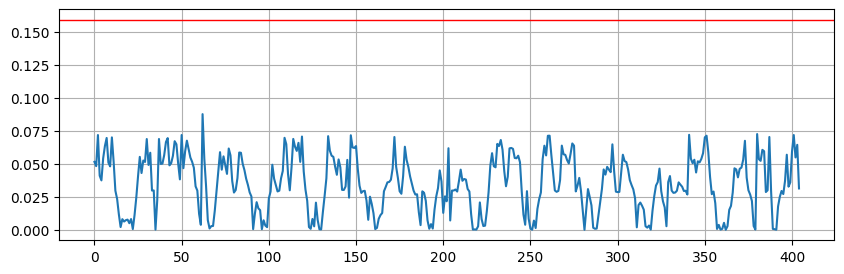

In [22]:
for i in test_num:
    number_num = number[number["num"]== i].dropna()
    number_num = number_num[[angle]]
    # number_num
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    test_no_x_predictions= lstm_ae.predict(number_num)
    test_no_mae_loss = np.mean(np.power(test_no_x_predictions - number_num,2), axis=1).flatten()
    print(len(test_no_mae_loss))
    
    real_a_point_list = len(test_no_mae_loss)
    # real_a_point_list = real_a_point.to_numpy().astype(int)
    
    plt.figure(figsize = (10,3))
    plt.plot(test_no_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=1)
    plt.grid()
    
    for j in range (real_a_point_list) :
        if test_no_mae_loss[j] >= threshold_ave:
            plt.scatter(j, test_no_mae_loss[j],c='r')         
    
    
    
    plt.show()
    
#     test_no_mae_loss_max = np.max(test_no_mae_loss)
#     print(f'Reconstruction error threshold: {test_no_mae_loss_max}')